In [195]:
%matplotlib inline

from matplotlib import pyplot as plt
import numpy as np

In [196]:
#based off 1996 data
delta_time = 50.0 * 60.0 # 15 minutes apart for recordings, times 60 to get seconds
h_0 = 2.76 * 6.95700e8 #height is 2.76 solar radius, in m
v_0 = 100  *1000 #velocity is 100 m/s
a_0 = 2 # m/s^2

time = np.arange(0.0, 1400.0*60, delta_time)
h = h_0 + (v_0 * time) + (0.5 * (time**2) * a_0) #fake height data
v = v_0 + (time * a_0)
noise_h = h + (h * np.random.normal(scale=0.005, size=len(h))) #data with noise


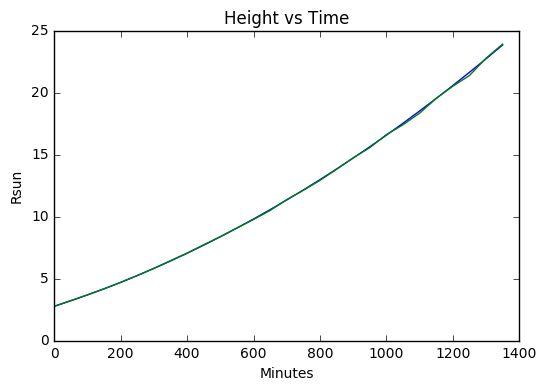

In [197]:
plt.title("Height vs Time")
plt.xlabel('Minutes')
plt.ylabel('Rsun')
plt.plot(time/60, h/6.95700e8)
plt.plot(time/60, noise_h/6.95700e8)

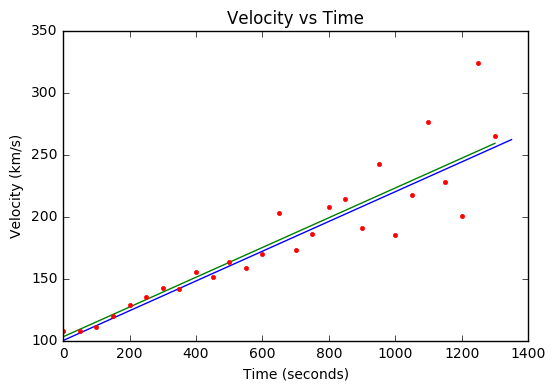

In [198]:
#Plot Velocity vs Time
diff_height_data=np.diff(h)
diff_time_data=np.diff(time)
velocity=diff_height_data/(diff_time_data.astype(float))
#for the noisy data
diff_noise_h_data=np.diff(noise_h)
noise_v=diff_noise_h_data/(diff_time_data.astype(float))

plt.title("Velocity vs Time")
plt.xlabel('Time (seconds)')
plt.ylabel('Velocity (km/s)')
plt.plot(time/60, v/1000)
plt.plot(time[:-1]/60, velocity/1000)

plt.plot(time[:-1]/60, noise_v/1000, '.')
plt.show()

C:\Users\Betsy\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: RuntimeWarning: divide by zero encountered in true_divide


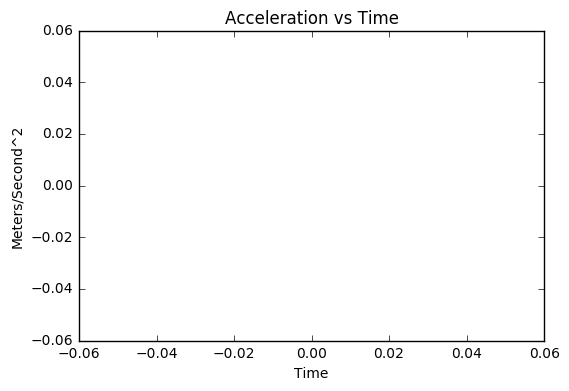

In [199]:
#it is a constant so it will just be a flat line
diff_v_data=np.diff(velocity)
diff_diff_time_data=np.diff(diff_time_data)
acc=diff_v_data/diff_diff_time_data.astype(float)

plt.title("Acceleration vs Time")
plt.xlabel('Time')
plt.ylabel('Meters/Second^2')
plt.plot(time[2:], acc,'+')
plt.show()